# Self-Tuning Network Control
Comparison of design-time vs run-time greedy actuator selection assuming full state feedback information
Linear, discrete time control

##### Python package initializer
Activate ipykernel for more plot interactions if required by uncommenting the matplotlib widget below

In [1]:
# %matplotlib widget
%load_ext autoreload

In [2]:
import numpy as np
from IPython.display import display, Latex

from functionfile_model import system_package1, create_graph, simulate_system, solve_constraints_initializer, plot_trajectory, plot_trajectory_comparisons, plot_trajectory_comparisons_2

%autoreload 2

print('Package initialization complete')

Package initialization complete


### Introduction

We compare 4 stages of control architecture with full-state feedback gain design
- Type 1: Design-time random actuator selection $B_S$ and design-time fixed feedback $K$ gain design. Most probably suboptimal control architecture should result with the highest control costs even with optimal gains

- Type 2: Run-time greedy actuator selection $B_{S,t}$ and run-time feedback gain $K_t$ design with current state $x_t$ information. Run-time architecture optimization using $x_t$ should result in better architecture than Type 2 and result with lowest control cost

### System Definition

System dynamics: $ x_{t+1} = A x_{t} + B_S u_{t} + w_{t} $

Open-loop dynamics: $A$ randomly generated, well-connected, undirected, uniformly weighted, ER network $(p=0.4)$ with $n_x=50$ nodes, scaled such that $|\lambda_{max}(A)|=\rho=2$

Actuator: $B_S$ or $B_{S,t}$ with cardinality constraint $|S|<=2$

Initial states: Randomly sampled from $X_0 = 10 \times \mathbf{I}_{n_x}$

Additive disturbances: Randomly sampled from $W = 10 \times \mathbf{I}_{n_x}$

In [3]:
nx = 50
p = 0.4
rho = 2

A = rho*create_graph(nx, 'ER', p)['A']
# A = rho*create_graph(nx, 'rand')['A']
S = 2
X0 = 10*np.random.rand(nx)
W = 10*np.identity(nx)

print('Initializing system and simulation conditions')

Sys = system_package1(A, S_in=S, X0_in=X0, W_in=W)

solve_constraints = solve_constraints_initializer(Sys)

print('Initialization done')

Initializing system and simulation conditions
Initialization done


### Run Code

In [4]:
simulate_results = {}

for K_type in [1, 2]:
    simulate_results[K_type] = simulate_system(Sys, K_type, solve_constraints)

Type 1: Design-time Fixed Architecture
      - Simulation complete
Type 2: Run-time Self-tuning Architecture
      - Simulation complete


### Results

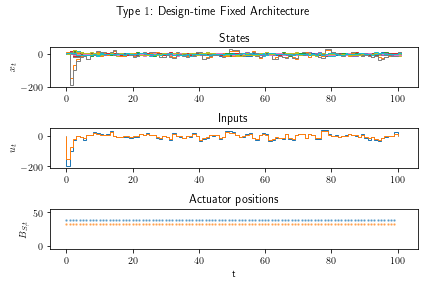

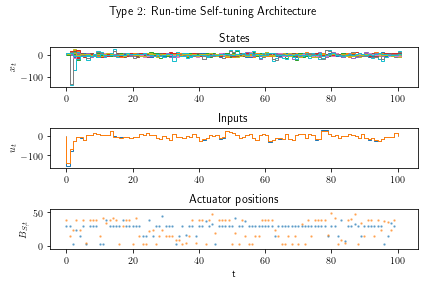

Cumulative cost comparison:
Type 1 cost: 315895.35
Type 2 cost: 230346.71
Type 2 Run-time Self-tuning Architecture cost improvement: 27.08 % of Type 1 Design-time Fixed Architecture


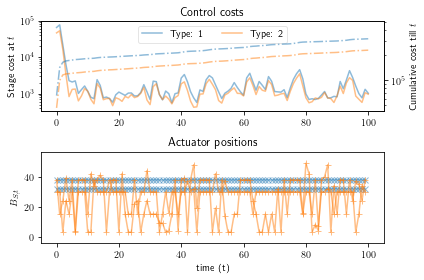

In [5]:
plot_trajectory_comparisons(simulate_results, 'images/Test0/Plt')

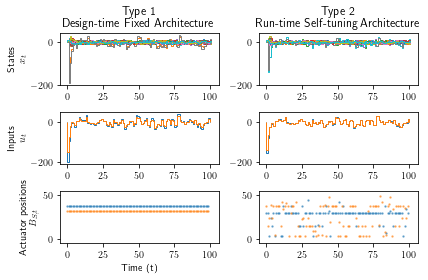

In [6]:
plot_trajectory_comparisons_2(simulate_results, 'images/Test0/Plt')

##### Notebook run completion

In [7]:
print('Notebook run completion')

Notebook run completion
